In [1]:
%autosave 0

Autosave disabled



# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model for classifying images of clothes

## 8.1 Fashion classification

Dataset:

- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

- https://cs231n.github.io/



In [2]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git


## 8.2 TensorFlow and Keras

- Installing TensorFlow
- Loading images



In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:


import tensorflow as tf
from tensorflow import keras



2023-11-04 16:38:54.816940: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [5]:
from tensorflow.keras.preprocessing.image import load_img

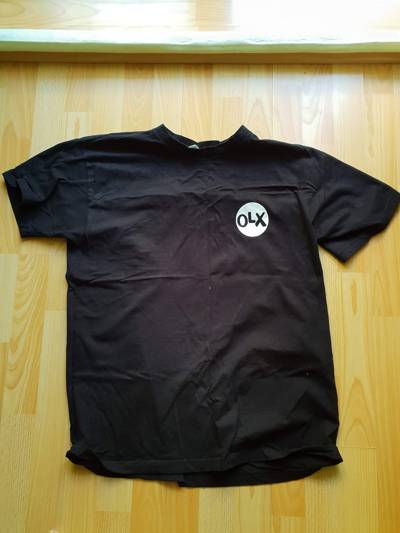

In [6]:


path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)



In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:


x = np.array(img)
x.shape



(299, 299, 3)


## 8.3 Pre-trained convolutional neural networks

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/



In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-11-04 16:38:57.392168: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-04 16:38:57.398263: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-11-04 16:38:57.438413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-04 16:38:57.438742: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 computeCapability: 7.5
coreClock: 1.455GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 327.88GiB/s
2023-11-04 16:38:57.438769: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-11-04 16:38:57.556562: I tensorflow/stream_executor/platform/de

In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

2023-11-04 16:38:58.810490: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-11-04 16:38:58.819058: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


In [15]:
pred.shape

(1, 1000)

In [16]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.67924464),
  ('n02916936', 'bulletproof_vest', 0.039600343),
  ('n04370456', 'sweatshirt', 0.035299607),
  ('n03710637', 'maillot', 0.010884146),
  ('n04525038', 'velvet', 0.0018057624)]]

## 8.4 Convolutional neural networks


- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/


## 8.5 Transfer learning

- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

(Better to run it with a GPU)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)


Found 3068 images belonging to 10 classes.


In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
X, y = next(train_ds)

In [21]:
X.shape

(32, 150, 150, 3)

In [22]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [24]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 53s 528ms/step - loss: 1.6109 - accuracy: 0.5699 - val_loss: 0.9457 - val_accuracy: 0.7654
Epoch 2/10
96/96 [==============================] - 50s 517ms/step - loss: 0.5463 - accuracy: 0.8276 - val_loss: 0.9966 - val_accuracy: 0.7390
Epoch 3/10
96/96 [==============================] - 51s 530ms/step - loss: 0.3709 - accuracy: 0.8720 - val_loss: 0.9549 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 51s 532ms/step - loss: 0.2262 - accuracy: 0.9206 - val_loss: 0.8399 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 56s 587ms/step - loss: 0.1275 - accuracy: 0.9516 - val_loss: 0.9795 - val_accuracy: 0.7918
Epoch 6/10
96/96 [==============================] - 55s 571ms/step - loss: 0.1347 - accuracy: 0.9446 - val_loss: 0.8663 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 55s 576ms/step - loss: 0.0791 - accuracy: 0.9711 - val_loss: 0.9839 - val_accuracy: 0.7947

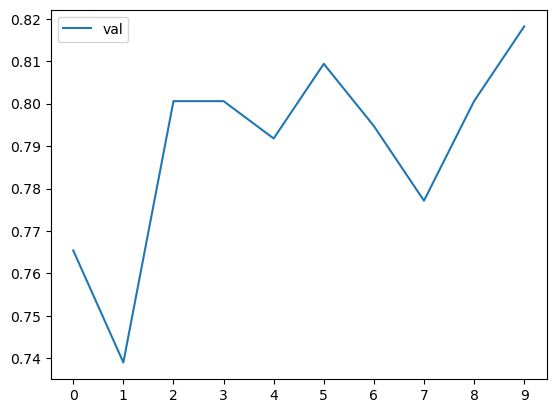

In [27]:


#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()




## 8.6 Adjusting the learning rate

- What's the learning rate
- Trying different values



In [28]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model


In [29]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 49s 493ms/step - loss: 2.1314 - accuracy: 0.2593 - val_loss: 1.5965 - val_accuracy: 0.4897
Epoch 2/10
96/96 [==============================] - 47s 492ms/step - loss: 1.4329 - accuracy: 0.5495 - val_loss: 1.2608 - val_accuracy: 0.6129
Epoch 3/10
96/96 [==============================] - 51s 533ms/step - loss: 1.1546 - accuracy: 0.6415 - val_loss: 1.0814 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 55s 576ms/step - loss: 1.0315 - accuracy: 0.6861 - val_loss: 0.9817 - val_accuracy: 0.6921
Epoch 5/10
96/96 [==============================] - 54s 561ms/step - loss: 0.9412 - accuracy: 0.6978 - val_loss: 0.9060 - val_accuracy: 0.7214
Epoch 6/10
96/96 [==============================] - 54s 558ms/step - loss: 0.8408 - accuracy: 0.7369 - val_loss: 0.8525 - val_accuracy: 0.7273
Epoch 7/10
96/96 [==============================] - 65s 674ms/step - loss: 0.8055 - accuracy: 0.7328 - val_loss: 0.8163 - val_accuracy:

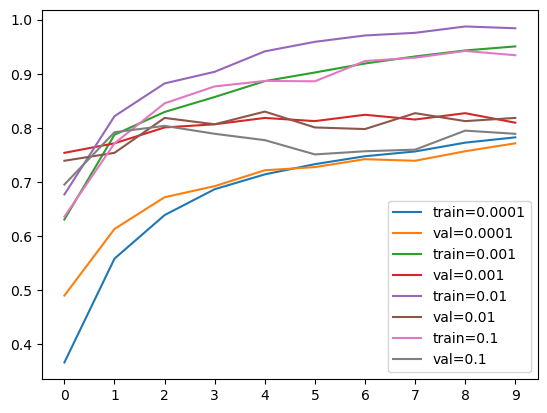

In [30]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [31]:
learning_rate = 0.001


## 8.7 Checkpointing

- Saving the best model only
- Training a model with callbacks



In [34]:
model.save_weights('model_v1.h5', save_format='h5')

In [35]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [36]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 51s 510ms/step - loss: 1.4535 - accuracy: 0.5063 - val_loss: 0.7534 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 52s 541ms/step - loss: 0.6318 - accuracy: 0.7880 - val_loss: 0.6442 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 50s 522ms/step - loss: 0.5122 - accuracy: 0.8230 - val_loss: 0.6055 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 56s 583ms/step - loss: 0.4050 - accuracy: 0.8665 - val_loss: 0.5813 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 60s 624ms/step - loss: 0.3759 - accuracy: 0.8862 - val_loss: 0.5732 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 55s 574ms/step - loss: 0.3168 - accuracy: 0.9127 - val_loss: 0.5673 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 53s 548ms/step - loss: 0.2794 - accuracy: 0.9243 - val_loss: 0.5625 - val_accuracy: 0.8240


## 8.8 Adding more layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer



In [37]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [38]:


learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()



10
Epoch 1/10
96/96 [==============================] - 59s 596ms/step - loss: 1.8530 - accuracy: 0.3699 - val_loss: 1.1747 - val_accuracy: 0.6158
Epoch 2/10
96/96 [==============================] - 61s 633ms/step - loss: 1.0381 - accuracy: 0.6598 - val_loss: 0.8830 - val_accuracy: 0.7419
Epoch 3/10
96/96 [==============================] - 58s 606ms/step - loss: 0.7574 - accuracy: 0.7624 - val_loss: 0.7959 - val_accuracy: 0.7507
Epoch 4/10
96/96 [==============================] - 54s 565ms/step - loss: 0.6508 - accuracy: 0.7945 - val_loss: 0.7159 - val_accuracy: 0.7830
Epoch 5/10
96/96 [==============================] - 58s 607ms/step - loss: 0.5347 - accuracy: 0.8329 - val_loss: 0.6632 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 62s 643ms/step - loss: 0.4534 - accuracy: 0.8572 - val_loss: 0.6344 - val_accuracy: 0.8065
Epoch 7/10
96/96 [==============================] - 61s 632ms/step - loss: 0.4061 - accuracy: 0.8814 - val_loss: 0.6732 - val_accuracy: 0.7

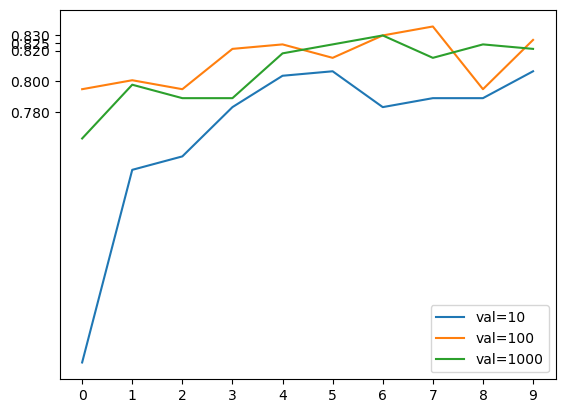

In [39]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()


## 8.9 Regularization and dropout

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values



In [41]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [42]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()


0.0
Epoch 1/30
96/96 [==============================] - 48s 478ms/step - loss: 1.1902 - accuracy: 0.6067 - val_loss: 0.6473 - val_accuracy: 0.7625
Epoch 2/30
96/96 [==============================] - 46s 483ms/step - loss: 0.5218 - accuracy: 0.8073 - val_loss: 0.5590 - val_accuracy: 0.8123
Epoch 3/30
96/96 [==============================] - 49s 507ms/step - loss: 0.3389 - accuracy: 0.8877 - val_loss: 0.5827 - val_accuracy: 0.8123
Epoch 4/30
96/96 [==============================] - 60s 630ms/step - loss: 0.2251 - accuracy: 0.9339 - val_loss: 0.5930 - val_accuracy: 0.7947
Epoch 5/30
96/96 [==============================] - 58s 599ms/step - loss: 0.1786 - accuracy: 0.9513 - val_loss: 0.5843 - val_accuracy: 0.8211
Epoch 6/30
96/96 [==============================] - 58s 602ms/step - loss: 0.1087 - accuracy: 0.9812 - val_loss: 0.5640 - val_accuracy: 0.8152
Epoch 7/30
96/96 [==============================] - 55s 569ms/step - loss: 0.0817 - accuracy: 0.9889 - val_loss: 0.5791 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 56s 585ms/step - loss: 0.0193 - accuracy: 0.9958 - val_loss: 0.7530 - val_accuracy: 0.8182
Epoch 29/30
96/96 [==============================] - 62s 650ms/step - loss: 0.0301 - accuracy: 0.9924 - val_loss: 0.7859 - val_accuracy: 0.8035
Epoch 30/30
96/96 [==============================] - 58s 606ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.7503 - val_accuracy: 0.8211


0.5
Epoch 1/30
96/96 [==============================] - 63s 634ms/step - loss: 1.6133 - accuracy: 0.4757 - val_loss: 0.7709 - val_accuracy: 0.7449
Epoch 2/30
96/96 [==============================] - 48s 504ms/step - loss: 0.8600 - accuracy: 0.7164 - val_loss: 0.6307 - val_accuracy: 0.7977
Epoch 3/30
96/96 [==============================] - 60s 625ms/step - loss: 0.6967 - accuracy: 0.7646 - val_loss: 0.5928 - val_accuracy: 0.8211
Epoch 4/30
96/96 [==============================] - 54s 558ms/step - loss: 0.5611 - accuracy: 0.8034 - val_loss: 0.5812 - val_accurac

Epoch 25/30
96/96 [==============================] - 57s 599ms/step - loss: 0.6669 - accuracy: 0.7488 - val_loss: 0.5356 - val_accuracy: 0.8299
Epoch 26/30
96/96 [==============================] - 57s 595ms/step - loss: 0.6186 - accuracy: 0.7606 - val_loss: 0.5375 - val_accuracy: 0.8182
Epoch 27/30
96/96 [==============================] - 58s 600ms/step - loss: 0.6429 - accuracy: 0.7585 - val_loss: 0.5265 - val_accuracy: 0.8299
Epoch 28/30
96/96 [==============================] - 54s 568ms/step - loss: 0.6115 - accuracy: 0.7537 - val_loss: 0.5320 - val_accuracy: 0.8387
Epoch 29/30
96/96 [==============================] - 54s 566ms/step - loss: 0.6302 - accuracy: 0.7513 - val_loss: 0.5237 - val_accuracy: 0.8299
Epoch 30/30
96/96 [==============================] - 58s 609ms/step - loss: 0.6016 - accuracy: 0.7771 - val_loss: 0.5044 - val_accuracy: 0.8387




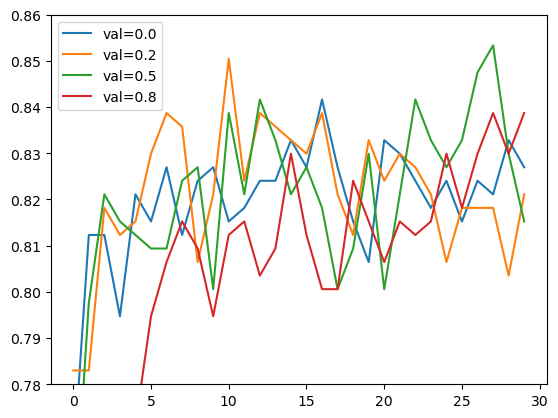

In [43]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

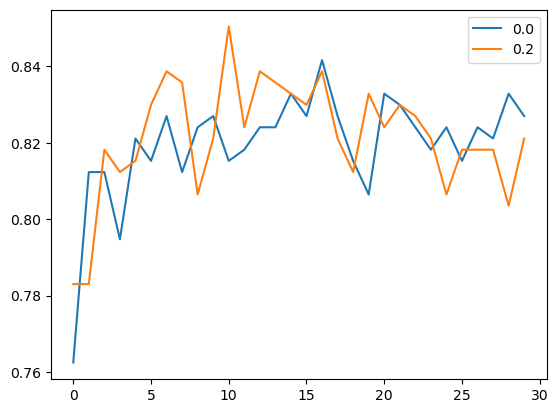

In [44]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

In [45]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [46]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess

AttributeError: module 'tensorflow' has no attribute 'Session'

## 8.10 Data augmentation

- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?



In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [ ]:


learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)



In [ ]:


hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()



## 8.11 Training a larger model

- Train a 299x299 model



In [47]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [48]:
input_size = 299

In [50]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [51]:


checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)



In [ ]:


learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])



Epoch 1/50
96/96 [==============================] - 246s 3s/step - loss: 1.4099 - accuracy: 0.5492 - val_loss: 0.5309 - val_accuracy: 0.8328
Epoch 2/50
96/96 [==============================] - 267s 3s/step - loss: 0.5358 - accuracy: 0.8204 - val_loss: 0.4334 - val_accuracy: 0.8651
Epoch 3/50
96/96 [==============================] - 254s 3s/step - loss: 0.4765 - accuracy: 0.8360 - val_loss: 0.3841 - val_accuracy: 0.8680
Epoch 4/50
 2/96 [..............................] - ETA: 3:59 - loss: 0.5706 - accuracy: 0.8203


## 8.12 Using the model

- Loading the model
- Evaluating the model
- Getting predictions

